# PyBEL Demo

This demo shows the ease of downloading a sample BEL file by URL and parsing it with `PyBEL`. 

In [1]:
import os, logging, time, math, shutil
from collections import Counter

import pybel
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pybel.print_version()

PyBEL Version: 0.2.4-dev


In [3]:
time.asctime()

'Wed Oct 26 19:00:22 2016'

In [4]:
logging.basicConfig(level=logging.INFO)
logging.getLogger("requests").setLevel(logging.WARNING)

In [5]:
bel_path = os.path.expanduser('~/.pybel/bel/')
if not os.path.exists(bel_path):
    os.makedirs(bel_path)

# Small Corpus

The example small corpus is distributed by the OpenBEL Consortium and has "approximately 2000 hand curated statements drawn from 57 PubMeds."

In [6]:
small_url = 'http://resource.belframework.org/belframework/1.0/knowledge/small_corpus.bel'

In [7]:
%%time
g_small = pybel.from_url(small_url)

INFO:pybel:Loading from url: http://resource.belframework.org/belframework/1.0/knowledge/small_corpus.bel
INFO:pybel:File length: 3596 lines
INFO:pybel:Loading definition cache from sqlite:////Users/cthoyt/.pybel/data/definitions.db
INFO:pybel:Initiation of definition cache took 0.01 seconds
INFO:pybel:Finished parsing document section in 0.00 seconds
INFO:pybel:Finished parsing definitions section in 2.44 seconds
INFO:pybel:Finished streamlining BEL parser in 4.69s
INFO:pybel:Finished parsing statements section in 13.45 seconds


CPU times: user 20.7 s, sys: 481 ms, total: 21.1 s
Wall time: 22.2 s


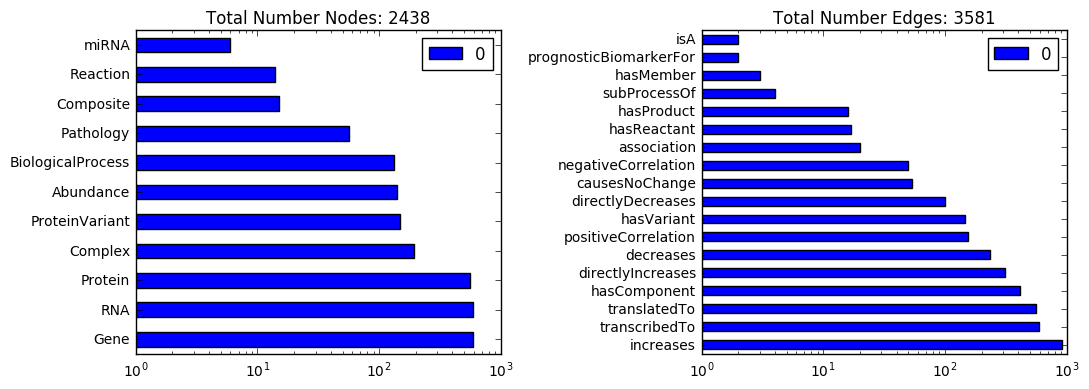

In [8]:
df = pd.DataFrame.from_dict(Counter(node[0] for node in g_small), orient='index')
ec = Counter(data[2]['relation'] for data in g_small.edges(data=True))
df_ec = pd.DataFrame.from_dict(ec, orient='index')

fig, axes = plt.subplots(1, 2, figsize=(11, 4))

df.sort_values(0, ascending=False).plot(kind='barh', logx=True, ax=axes[0])
axes[0].set_title('Total Number Nodes: {}'.format(g_small.number_of_nodes()))

df_ec.sort_values(0, ascending=False).plot(kind='barh', logx=True, ax=axes[1])
axes[1].set_title('Total Number Edges: {}'.format(g_small.number_of_edges()))

plt.tight_layout()
plt.show()

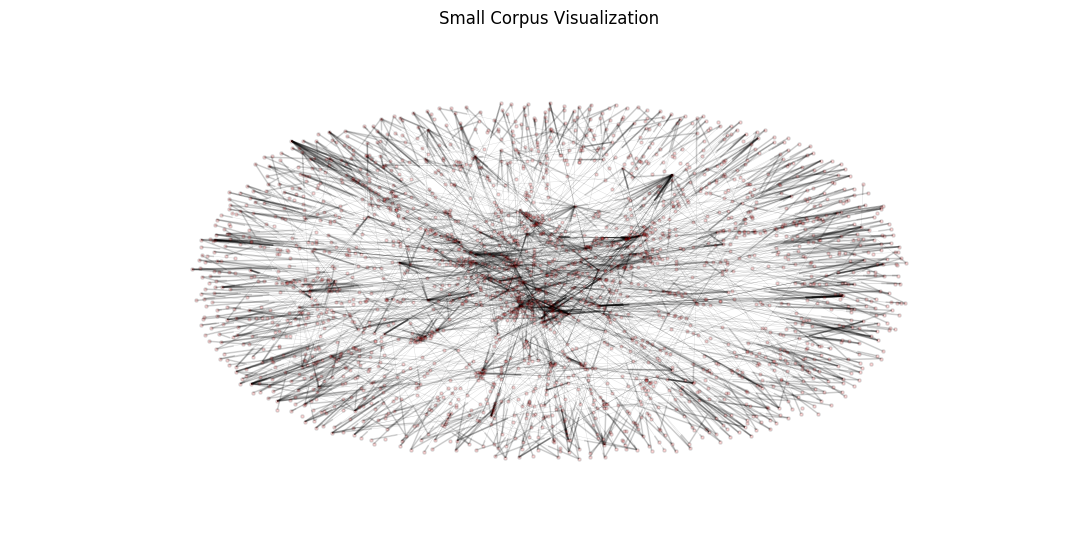

In [9]:
plt.figure(figsize=(10, 5))
nx.draw_spring(g_small, 
               k=4/math.sqrt(len(g_small)),
               iterations=1000,
               node_size=5, 
               width=0.3,  
               alpha=0.15)
plt.title('Small Corpus Visualization')

# Large Corpus

The example small corpus is distributed by the OpenBEL Consortium and has "approximately 61,000 statements."

In [10]:
large_url = 'http://resource.belframework.org/belframework/1.0/knowledge/large_corpus.bel'

In [11]:
%%time
g_large = pybel.from_url(large_url)

INFO:pybel:Loading from url: http://resource.belframework.org/belframework/1.0/knowledge/large_corpus.bel
INFO:pybel:File length: 189884 lines
INFO:pybel:Loading definition cache from sqlite:////Users/cthoyt/.pybel/data/definitions.db
INFO:pybel:Initiation of definition cache took 0.00 seconds
INFO:pybel:Finished parsing document section in 0.00 seconds
INFO:pybel:Inserting Namespace http://resource.belframework.org/belframework/1.0/namespace/go-cellular-component-accession-numbers.belns to definitions cache 
INFO:pybel:Finished parsing definitions section in 2.26 seconds
INFO:pybel:Finished streamlining BEL parser in 4.43s
INFO:pybel:Finished parsing statements section in 497.45 seconds


CPU times: user 8min 24s, sys: 1.06 s, total: 8min 25s
Wall time: 8min 30s


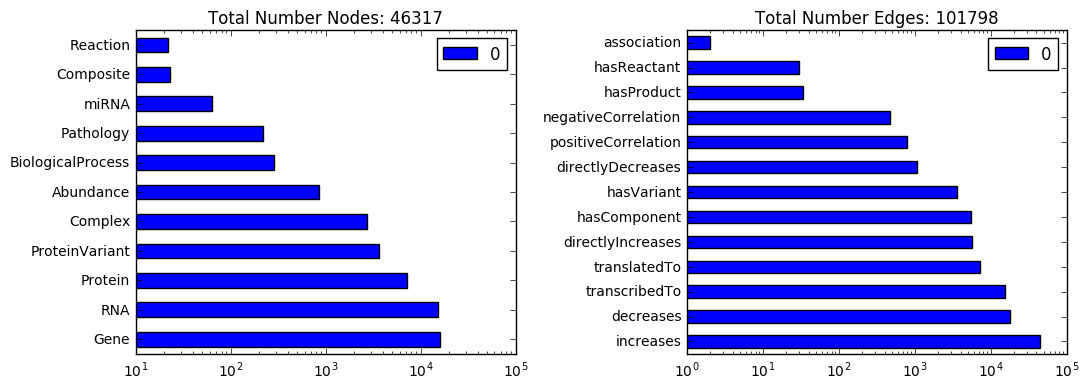

In [12]:
df = pd.DataFrame.from_dict(Counter(node[0] for node in g_large), orient='index')
ec = Counter(data[2]['relation'] for data in g_large.edges(data=True))
df_ec = pd.DataFrame.from_dict(ec, orient='index')

fig, axes = plt.subplots(1, 2, figsize=(11, 4))

df.sort_values(0, ascending=False).plot(kind='barh', logx=True, ax=axes[0])
axes[0].set_title('Total Number Nodes: {}'.format(g_large.number_of_nodes()))

df_ec.sort_values(0, ascending=False).plot(kind='barh', logx=True, ax=axes[1])
axes[1].set_title('Total Number Edges: {}'.format(g_large.number_of_edges()))

plt.tight_layout()
plt.show()